In [1]:
import numpy as np
import matplotlib.pyplot as plt

from torchvision import transforms
from PIL import Image

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode

LABEL_CODES = [(255,0,0),    # background
               (127,0,0),    # hair
               (255,255,0),  # skin
               (0,0,255),    # eyes
               (0,255,255),  # nose
               (0,255,0)]    # mouth

n_labels = 6

In [2]:
def closest_color(rgb, colors):
    """
    :param rgb: color in rgb format (tuple)
    :param colors: list of rgb colors
    :return: closest color to `rgb` from `colors`. "closest" determined as minimum euclidean distance
    """
    r, g, b = rgb
    color_diffs = []
    for color in colors:
        cr, cg, cb = color
        color_diff = np.sqrt((r - cr) ** 2 + (g - cg) ** 2 + (b - cb) ** 2)
        color_diffs.append((color_diff, color))
    return min(color_diffs)[1]

def imgshow(img):
    plt.axis("off")
    plt.imshow(img.astype('uint8'))

In [3]:
color2label = {label_code: label_ for label_code, label_ in zip(LABEL_CODES, range(n_labels))}
label2color = {label_: label_code for label_code, label_ in zip(LABEL_CODES, range(n_labels))}

In [4]:
def mask2label(mask):
    height, width, ch = mask.shape

    mask_labels = np.zeros((height, width), dtype=np.float32)
    for h_ in range(height):
        for w_ in range(width):
            r_, g_, b_ = mask[h_, w_, :]
            color = (r_, g_, b_)
            color = closest_color(color, LABEL_CODES)
            mask_labels[h_, w_] = color2label[color]
    return mask_labels       


def label2mask(labelmask):
    height, width = labelmask.shape
    
    mask = np.zeros((height, width, 3), dtype=np.float32)
    for h_ in range(height):
        for w_ in range(width):
            label_ = labelmask[h_, w_]
            mask[h_, w_] = label2color[label_]
    return mask     

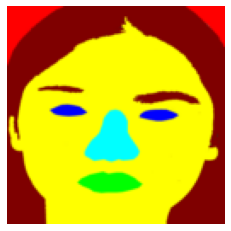

In [5]:
fname = "1.bmp"
# fname = glob.glob(os.path.join(DATA_FOLDER, 'Train_Labels','*.bmp'))[0]

img_pil = Image.open(fname)
img_np = np.array(img_pil)
resize = transforms.Resize((128,128))
img_resize = resize(img_pil)
img_np_resize = np.array(img_resize)

imgshow(img_np_resize)

In [6]:
ans = mask2label(img_np_resize)
orig = label2mask(ans)

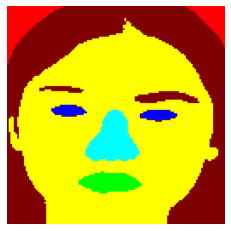

In [7]:
imgshow(orig)